<a href="https://colab.research.google.com/github/YoungVoid/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project

Author: Nian Vrey

# Project Overview

Working with different datasets to create models that will predict outcomes based on the data given.

## Setup

In [128]:
# Imports
import pandas as pd
import numpy as np
from missingno import matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [104]:
# Configurations
pd.set_option('display.max_columns', None)

# Adult Income

## Data Dictionary

age: the age of an individual
- Integer greater than 0

workclass: a general term to represent the employment status of an individual

- Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
Without­pay, Never­worked.

fnlwgt: final weight. In other words, this is the number of people the census believes the entry represents..

- Integer greater than 0

education: the highest level of education achieved by an individual.

- Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.

education­num: the highest level of education achieved in numerical form.

- Integer greater than 0

marital­status: marital status of an individual. Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.
- Married­civ­spouse, Divorced, Never­married, Separated, Widowed,
Married­spouse­absent, Married­AF­spouse.

occupation: the general type of occupation of an individual

- Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,
Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical,
Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv,
Armed­Forces.

relationship: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all

-  Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.

race: Descriptions of an individual’s race

- White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black.

sex: the biological sex of the individual

- Male, Female

capital­gain: capital gains for an individual

- Integer greater than or equal to 0

capital­loss: capital loss for an individual

- Integer greater than or equal to 0

hours­per­week: the hours an individual has reported to work per week

- continuous.

native­country: country of origin for an individual

- United­States, Cambodia, England, Puerto­Rico, Canada, Germany,
Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran,
Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador,
Trinadad&Tobago, Peru, Hong, Holand­Netherlands.

the label: whether or not an individual makes more than $50,000 annually.

- <=50k, >50k


## Uploading the data

In [105]:
# Read csv into DataFrame
fpath_adult_income = 'https://raw.githubusercontent.com/YoungVoid/Machine-Learning/main/Adult%20Income%20Dataset/adult.csv'
df_adult_income = pd.read_csv(fpath_adult_income)

In [106]:
df_adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [107]:
df_adult_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Initial Data Analysis

> Source of data

https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

> Brief description of data

The data notes down personal information of an adult, such as Age and Occupation

> What is the target?

The target to predict is column 'income', which is the income class that the adult falls in, whether they make more than 50k per annum, or 50k and less.

> What does one row represent? (A person? A business? An event? A product?)

Each row represents an adult person.

> Is this a classification or regression problem?

This is a classification problem, with 2 outcomes (more than 50k, 50k and less)

> How many features does the data have?

There are 14 features

> How many rows are in the dataset?

There are 48842 rows

> What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

There are a number of missing values, represented by a ? instead of being Null. Otherwise it will just be a normal data cleaning process, with some renaming and changing of values.

## Exploratory Data Analysis

### Setup & Data Cleaning

In [108]:
# Make a copy of the initial DataFrame for the Exploratory Data Analysis
df_adult_income_explore = df_adult_income.copy()

In [109]:
df_adult_income_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [110]:
df_adult_income_explore.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [111]:
df_adult_income_explore.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [112]:
df_adult_income_explore['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

Dropping education. Education and education-num represents the same value, therefore we only require one.

There may be a argument to drop relationship since it is very similar to marital-status, but it has been decided to keep the column due to the amount of values that does not correspond with marital-status.

In [113]:
# Drop unnecessary columns
df_adult_income_explore.drop(columns=['education'])

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [114]:
# Rename Columns
# Naming convention is CamelCase
renameDict = {'age':'Age',
              'workclass':'WorkingClass',
              'fnlwgt':'FinalWeight',
#              'education':'Education',
              'educational-num':'EducationNumber',
              'marital-status':'MaritalStatus',
              'occupation':'Occupation',
              'relationship':'Relationship',
              'race':'Race',
              'gender':'Gender',
              'capital-gain':'CapitalGain',
              'capital-loss':'capitalLoss',
              'hours-per-week':'HoursPerWeek',
              'native-country':'Country',
              'income':'Income',}

df_adult_income_explore.rename(columns=renameDict, inplace=True)

In [115]:
# Find categorical columns with columns with missing values
for col in df_adult_income_explore.select_dtypes('object'):
  try:
    missingCount = df_adult_income_explore[col].value_counts()['?']
    totalCount = df_adult_income_explore[col].value_counts().sum()
    print(f'Column: {col}\nMissing: {missingCount} ({missingCount/totalCount*100:.2f}%)\n')
  except KeyError:
    continue

Column: WorkingClass
Missing: 2799 (5.73%)

Column: Occupation
Missing: 2809 (5.75%)

Column: Country
Missing: 857 (1.75%)



In [116]:
# Replace ? with NaN values
df_adult_income_explore['WorkingClass'].replace('?', np.nan,inplace=True)
df_adult_income_explore['Occupation'].replace('?', np.nan,inplace=True)
df_adult_income_explore['Country'].replace('?', np.nan,inplace=True)

In [117]:
df_adult_income_explore.isna().sum()

Age                   0
WorkingClass       2799
FinalWeight           0
education             0
EducationNumber       0
MaritalStatus         0
Occupation         2809
Relationship          0
Race                  0
Gender                0
CapitalGain           0
capitalLoss           0
HoursPerWeek          0
Country             857
Income                0
dtype: int64

In [118]:
df_adult_income_explore.value_counts('WorkingClass')

WorkingClass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
dtype: int64

In [119]:
df_adult_income_explore.value_counts('Occupation')

Occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
dtype: int64

In [120]:
df_adult_income_explore.value_counts('Country')

Country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador             

<Axes: >

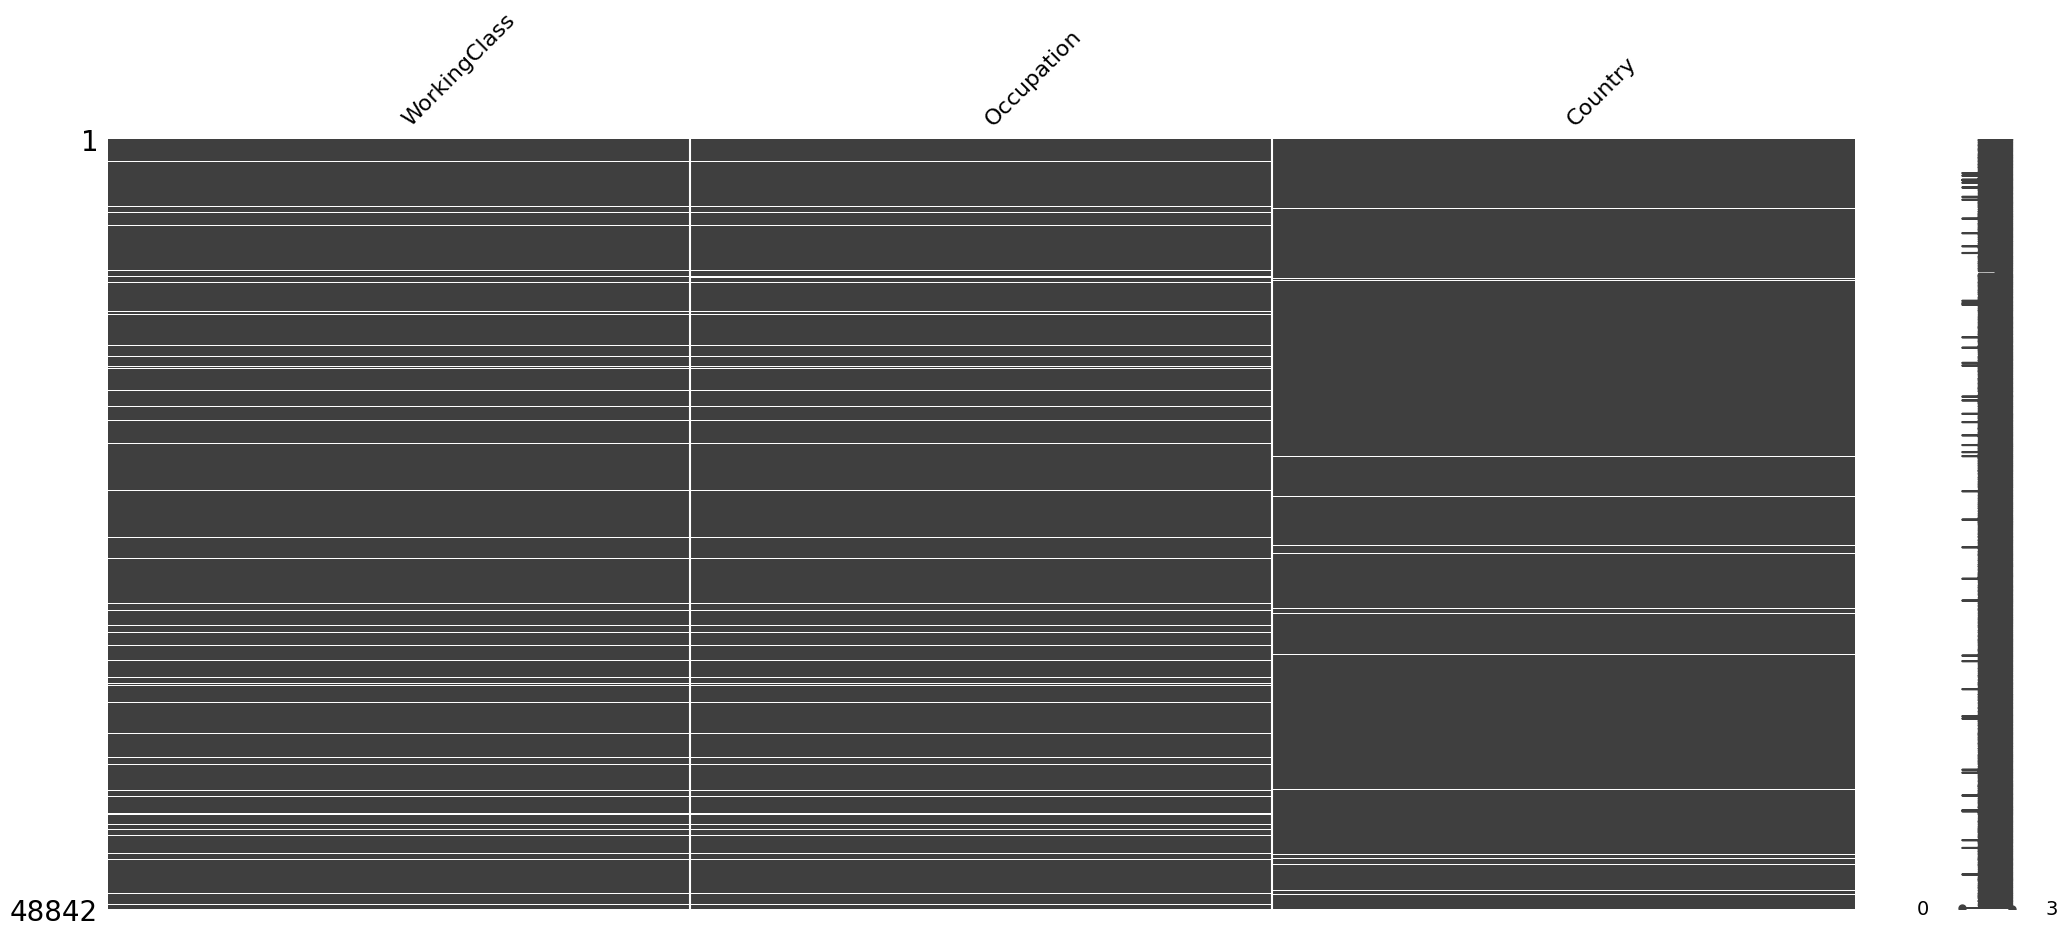

In [121]:
# Check which null values may have corresponding rows
matrix(df_adult_income_explore[['WorkingClass', 'Occupation','Country']])

In [127]:
# Set missing values to MISSING for graphs
placeholder = 'MISSING'
df_adult_income_explore['WorkingClass'].fillna(value=placeholder,inplace=True)
df_adult_income_explore['Occupation'].fillna(value=placeholder,inplace=True)
df_adult_income_explore['Country'].fillna(value=placeholder,inplace=True)

In [123]:
df_adult_income_explore.isna().sum()

Age                0
WorkingClass       0
FinalWeight        0
education          0
EducationNumber    0
MaritalStatus      0
Occupation         0
Relationship       0
Race               0
Gender             0
CapitalGain        0
capitalLoss        0
HoursPerWeek       0
Country            0
Income             0
dtype: int64

### EDA Custom Functions

In [173]:
def InspectFeature(feature, df=df_adult_income_explore, printPlots=True,
                   target='Income', fillna=False,
                   placeholder = 'MISSING', figsize = (24,8),
                   order=None, **kwargs):
  '''
  Create InspectFeature function to help with inspecting each feature
  Parameters:
    feature -> The dataframe column to inspect
    df -> The dataframe to be used
    printPlots -> True to print plots(default), False to only print stats(quicker runtime and takes less space).
    fillna -> True to fill null values with placeholder
    placeholder -> value to fill null values with if fill=True
    figsize -> Size of figs
    order -> Order to use in figs
    **Kwargs for regplot
  '''
  temp_df = df.copy()

  # Calculate stats before fillna
  dtype = temp_df[feature].dtype
  null_counts = temp_df[feature].isna().sum()

  # Fillna if True
  if fillna == True:
    temp_df[feature] = temp_df[feature].fillna(placeholder)
    null_counts_after_fillna = temp_df[feature].isna().sum()

  # Calculate stats after fillna
  unique_counts = temp_df[feature].nunique()
  total_size = len(temp_df[feature])
  value_counts = temp_df[feature].value_counts()

  # Print Stats
  print(f'Inspecting feature {feature}')
  print(f'Data Type: {dtype}')
  print(f'Total Size: {total_size}')
  print(f'Unique Values: {unique_counts} ({unique_counts/total_size * 100:,.2f}%)')
  if fillna == True:
    print(f'Null Values before fillna: {null_counts} ({null_counts/total_size * 100:,.2f}%)')
    print(f'Null Values after fillna: {null_counts_after_fillna} ({null_counts_after_fillna/total_size * 100:,.2f}%)')
  else:
    print(f'Null Values: {null_counts} ({null_counts/total_size * 100:,.2f}%)')


  # Print Plots
  if printPlots == True:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(f'Distribution of {feature}')
    #ax1.plot(x, y)
    #ax2.plot(x, -y)
    # Histplot for numeric, countplot for categorical
    if dtype == 'float64' or dtype == 'int64':
      ax1plot = sns.histplot(data=temp_df, x=feature, ax=ax1);
      ax2plot = sns.histplot(data=temp_df, x=feature, hue=target, ax=ax2);
    elif dtype == 'object':
      # Order by highest value counts
      if order == None:
        order = temp_df[feature].value_counts().index

      ax1plot = sns.countplot(data=temp_df, y=feature, ax=ax1, order=order);
      ax2plot = sns.countplot(data=temp_df, y=feature, hue=target, ax=ax2, order=order);
    else:
      print("Unsure which plot to use for dtype, defaulting to histplot")
      ax1plot = sns.histplot(data=temp_df, x=feature, ax=ax1);
      ax2plot = sns.histplot(data=temp_df, x=feature, hue=target, ax=ax2);

    plt.show()

### Feature Inspection

Inspecting feature Age
Data Type: int64
Total Size: 48842
Unique Values: 74 (0.15%)
Null Values: 0 (0.00%)


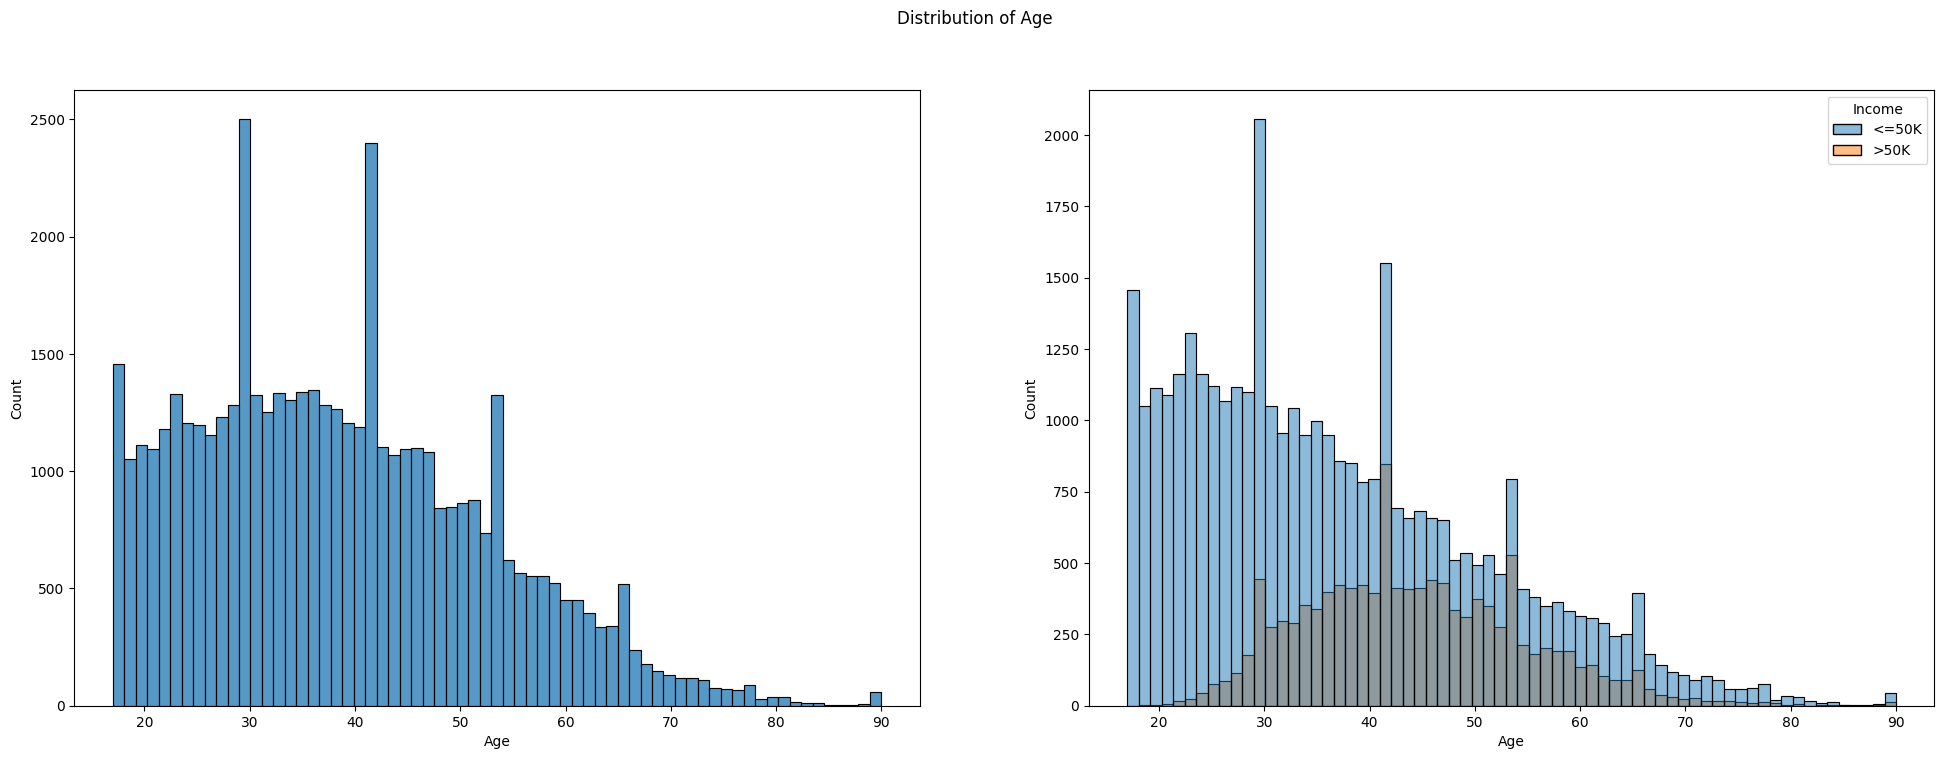


Inspecting feature WorkingClass
Data Type: object
Total Size: 48842
Unique Values: 9 (0.02%)
Null Values: 0 (0.00%)


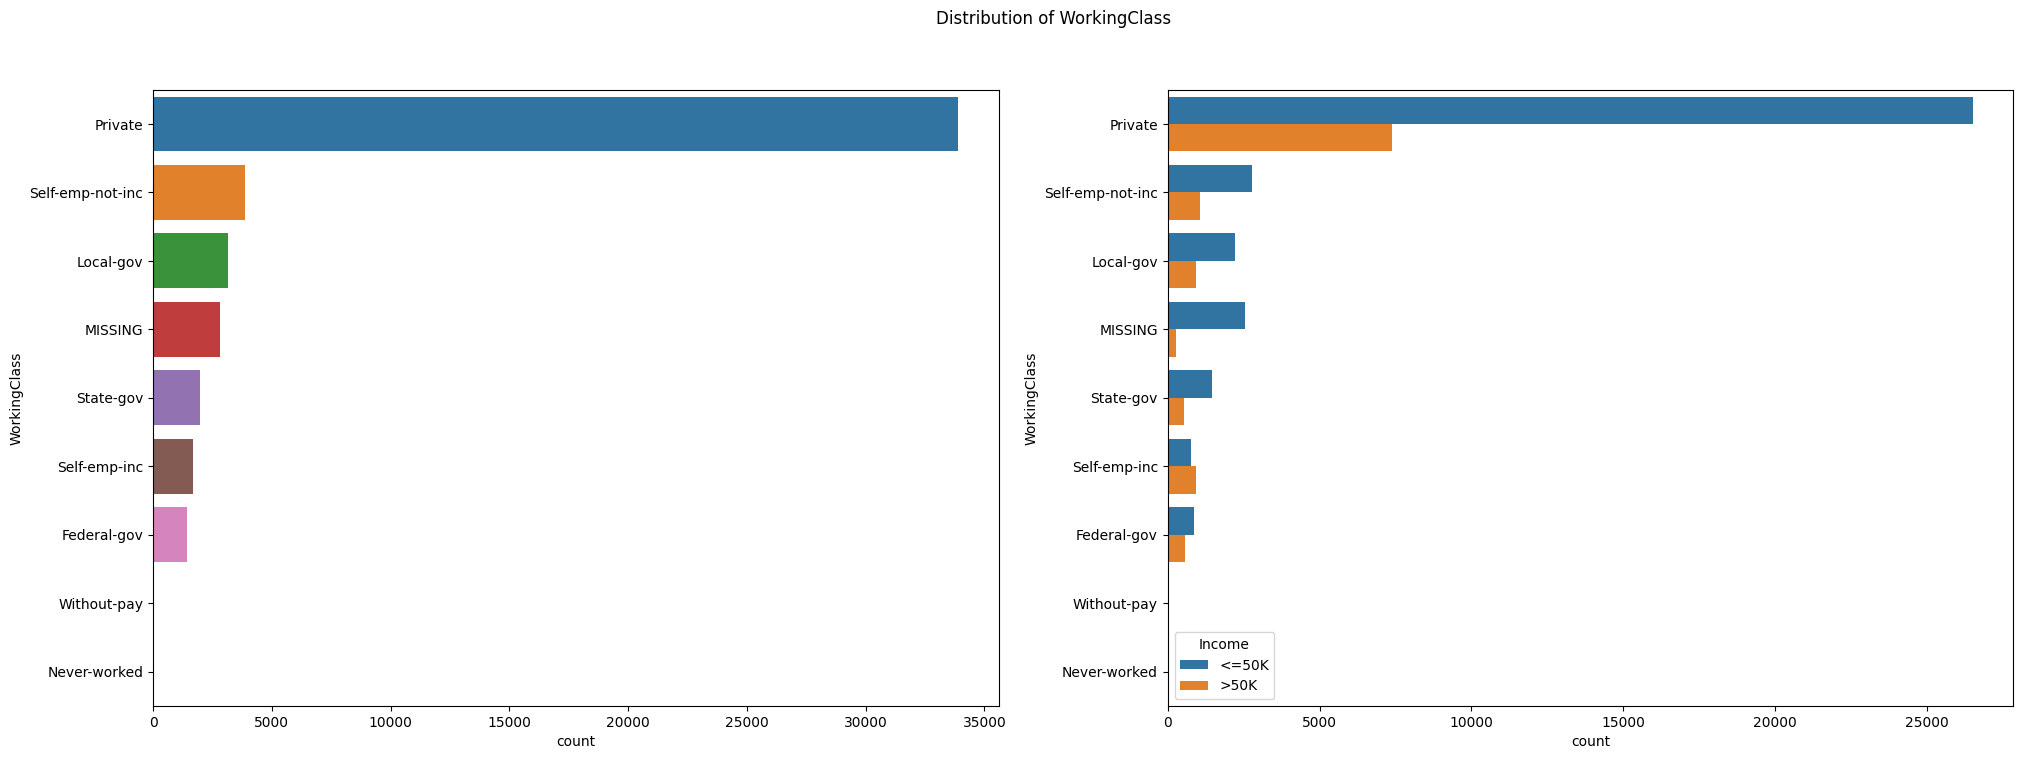


Inspecting feature FinalWeight
Data Type: int64
Total Size: 48842
Unique Values: 28523 (58.40%)
Null Values: 0 (0.00%)


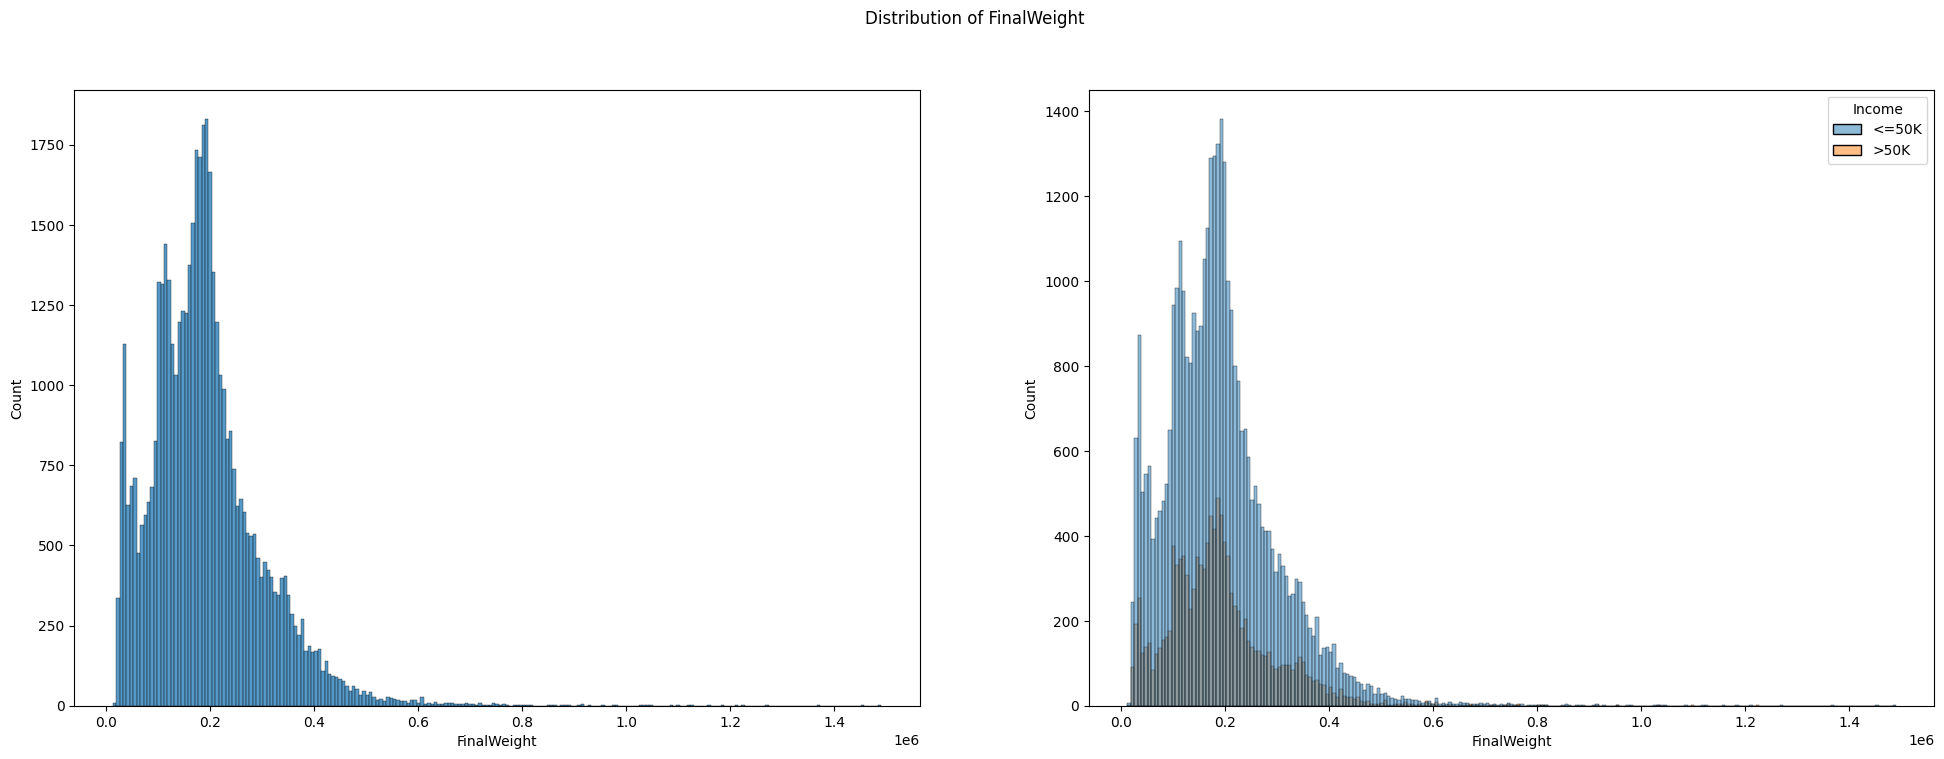


Inspecting feature education
Data Type: object
Total Size: 48842
Unique Values: 16 (0.03%)
Null Values: 0 (0.00%)


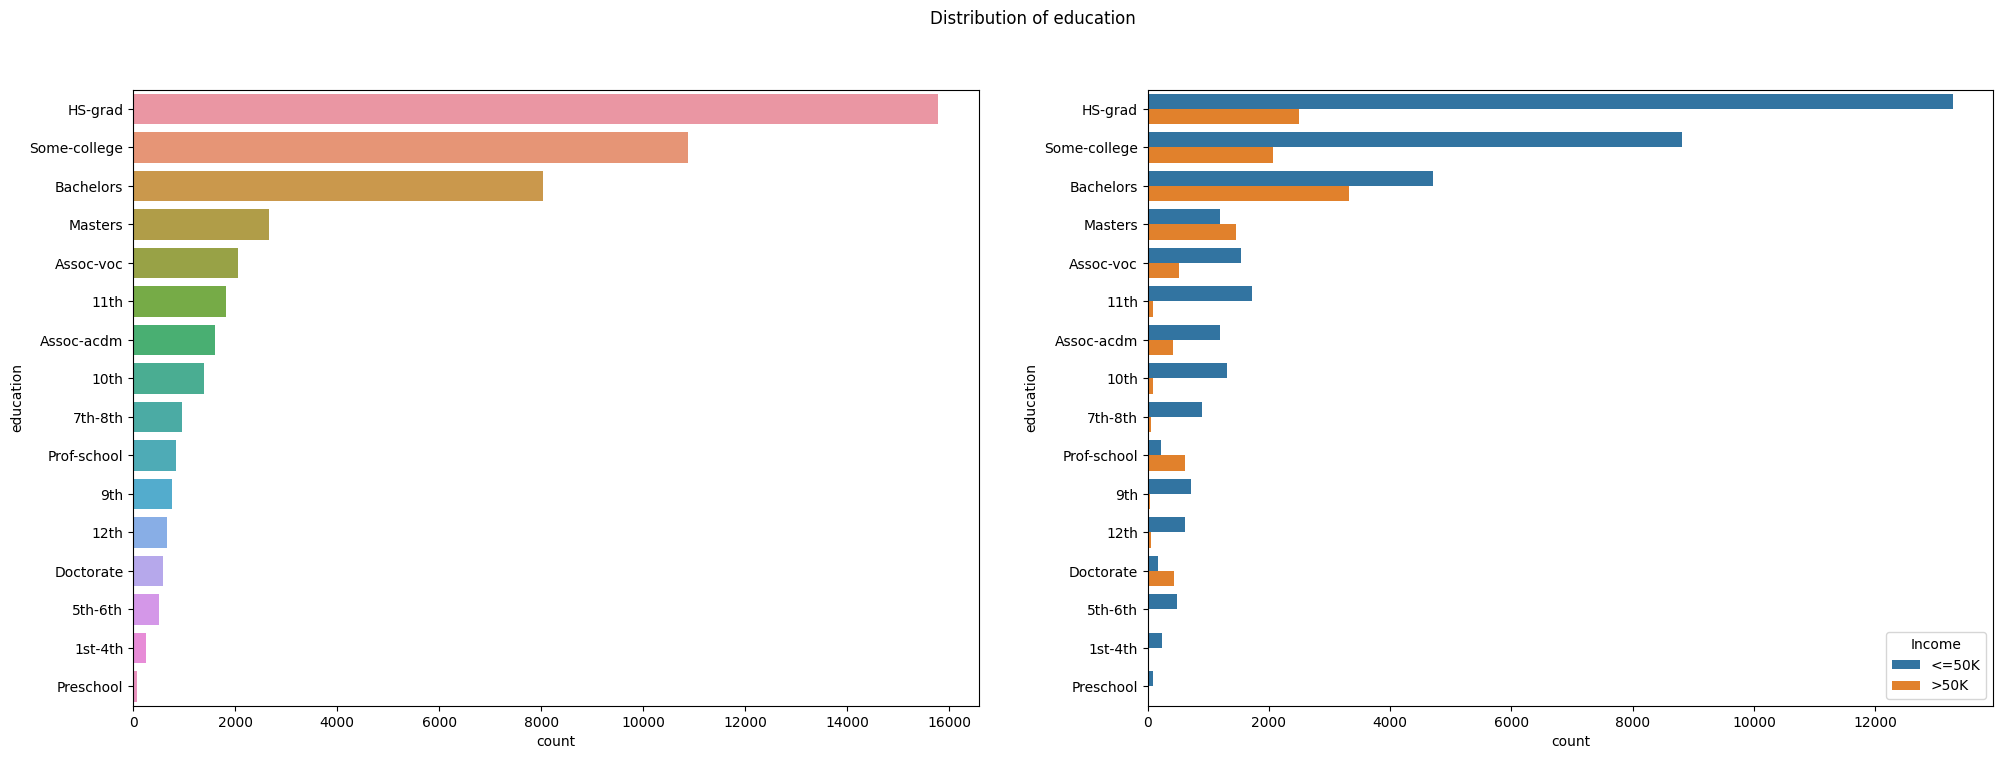


Inspecting feature EducationNumber
Data Type: int64
Total Size: 48842
Unique Values: 16 (0.03%)
Null Values: 0 (0.00%)


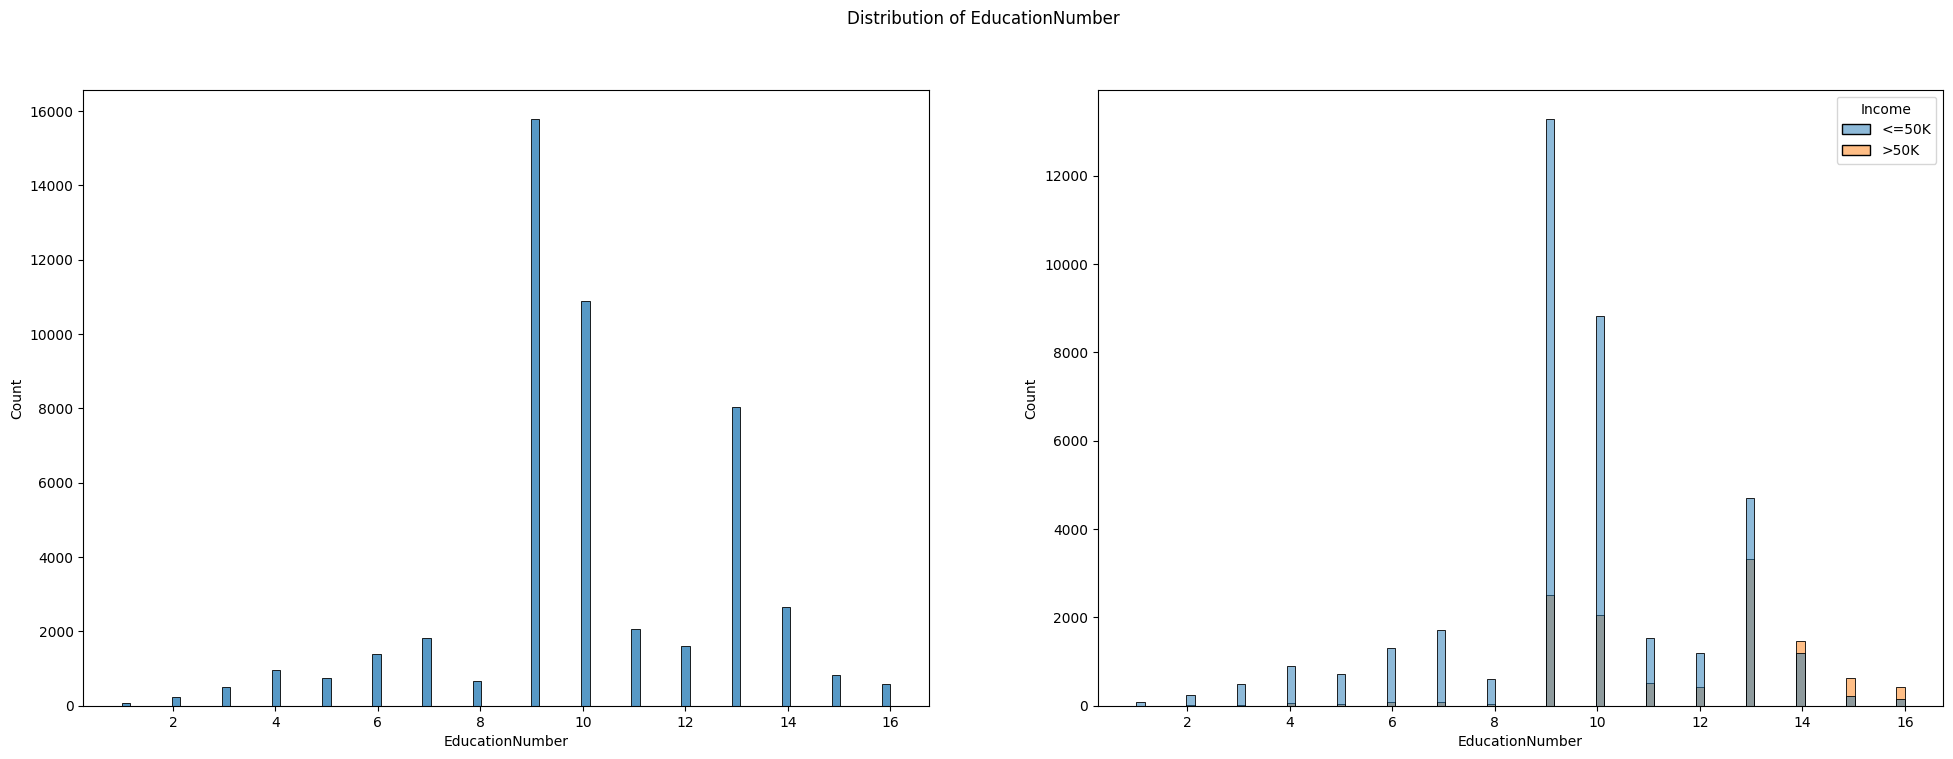


Inspecting feature MaritalStatus
Data Type: object
Total Size: 48842
Unique Values: 7 (0.01%)
Null Values: 0 (0.00%)


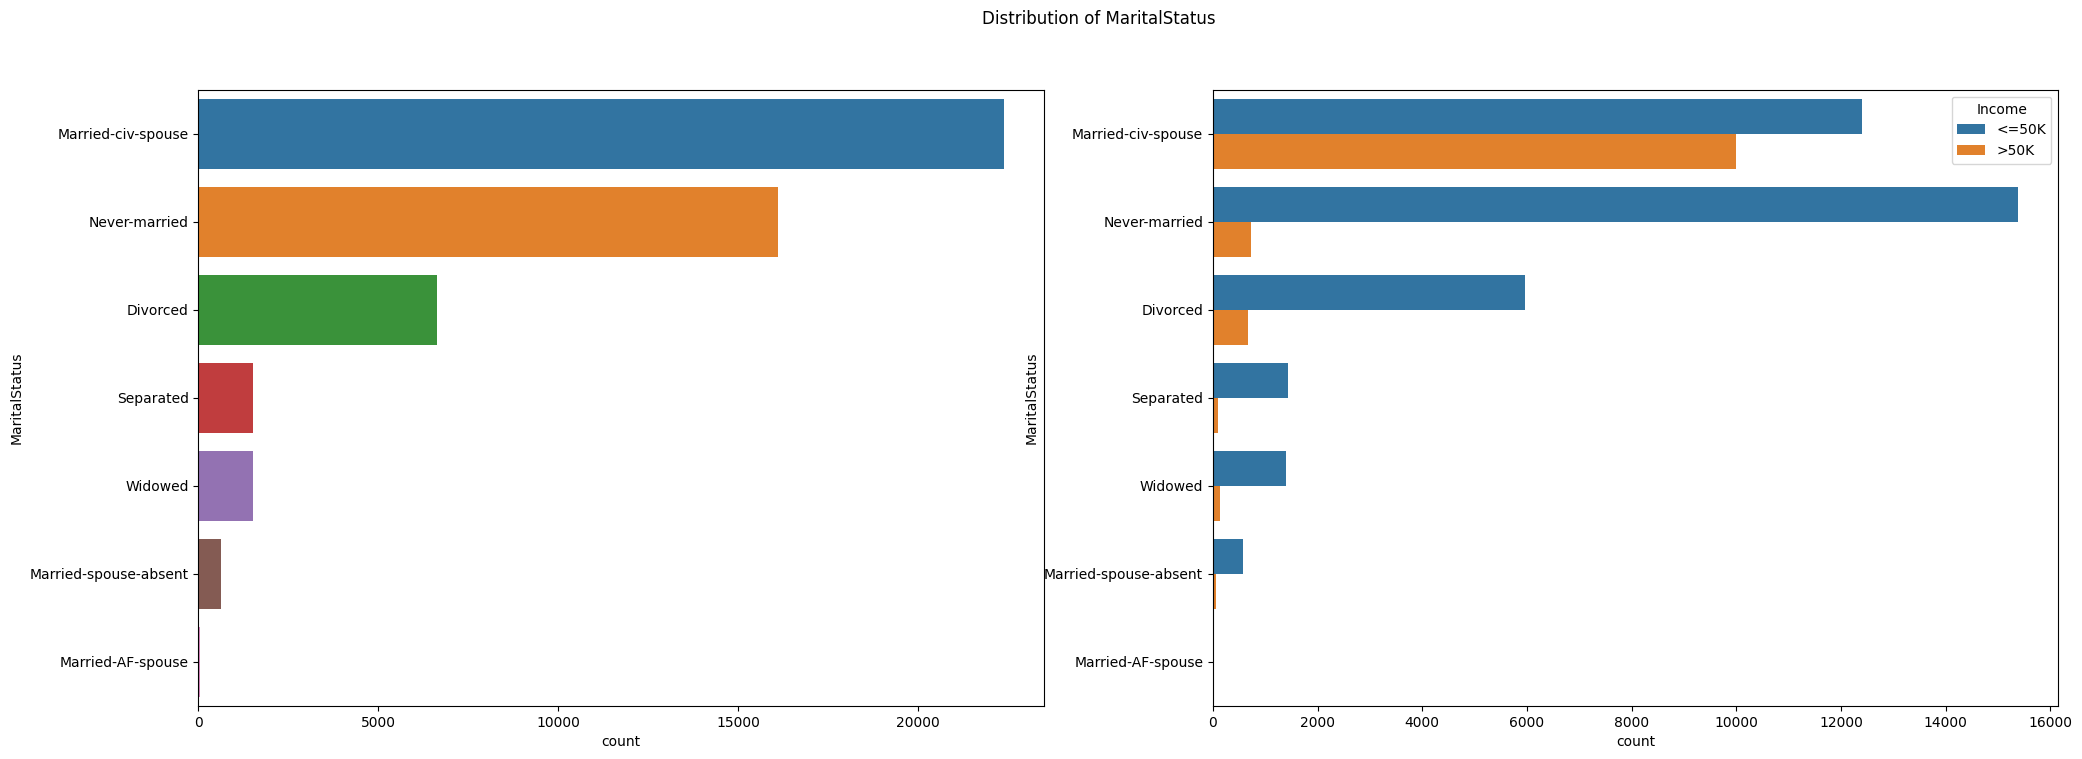


Inspecting feature Occupation
Data Type: object
Total Size: 48842
Unique Values: 15 (0.03%)
Null Values: 0 (0.00%)


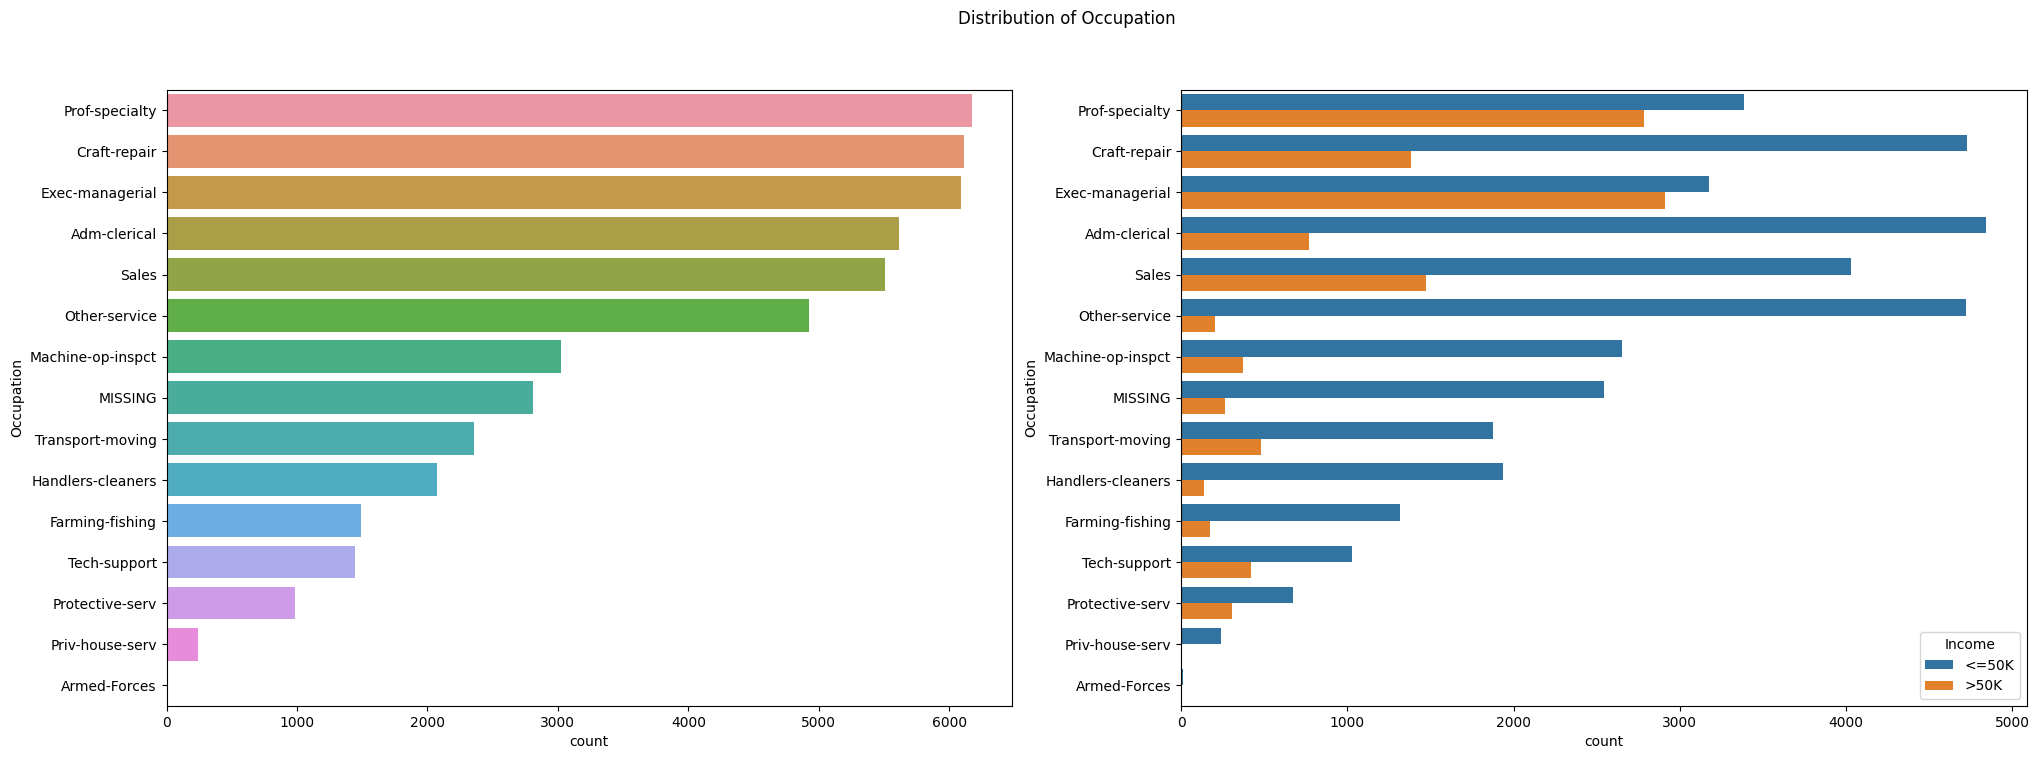


Inspecting feature Relationship
Data Type: object
Total Size: 48842
Unique Values: 6 (0.01%)
Null Values: 0 (0.00%)


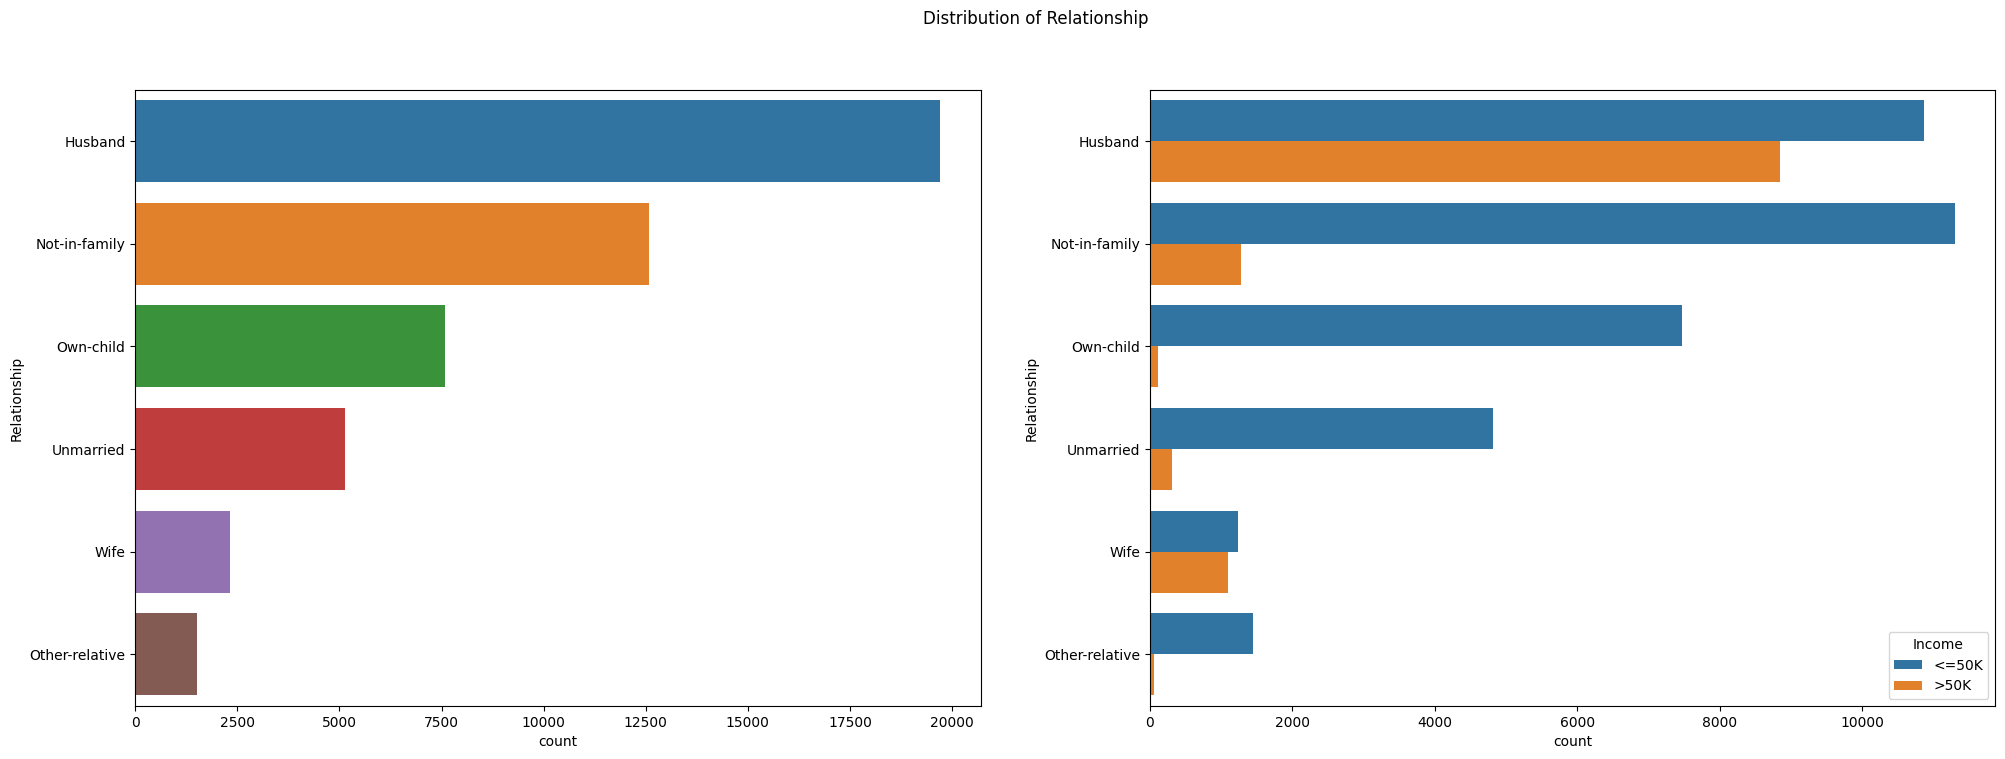


Inspecting feature Race
Data Type: object
Total Size: 48842
Unique Values: 5 (0.01%)
Null Values: 0 (0.00%)


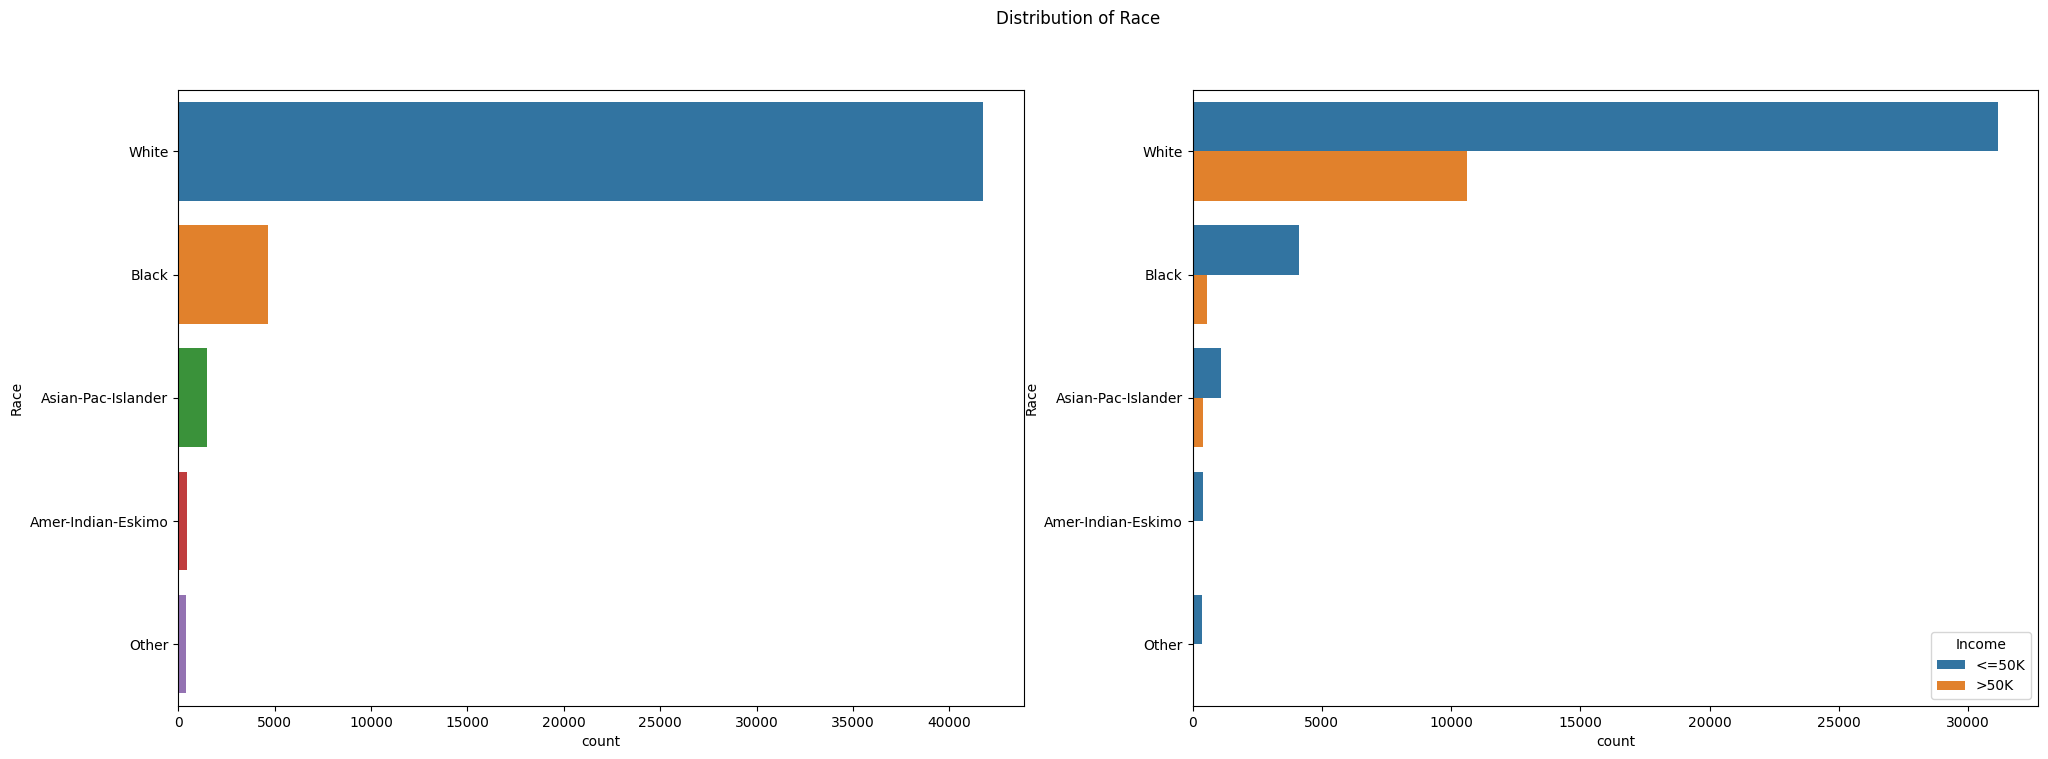


Inspecting feature Gender
Data Type: object
Total Size: 48842
Unique Values: 2 (0.00%)
Null Values: 0 (0.00%)


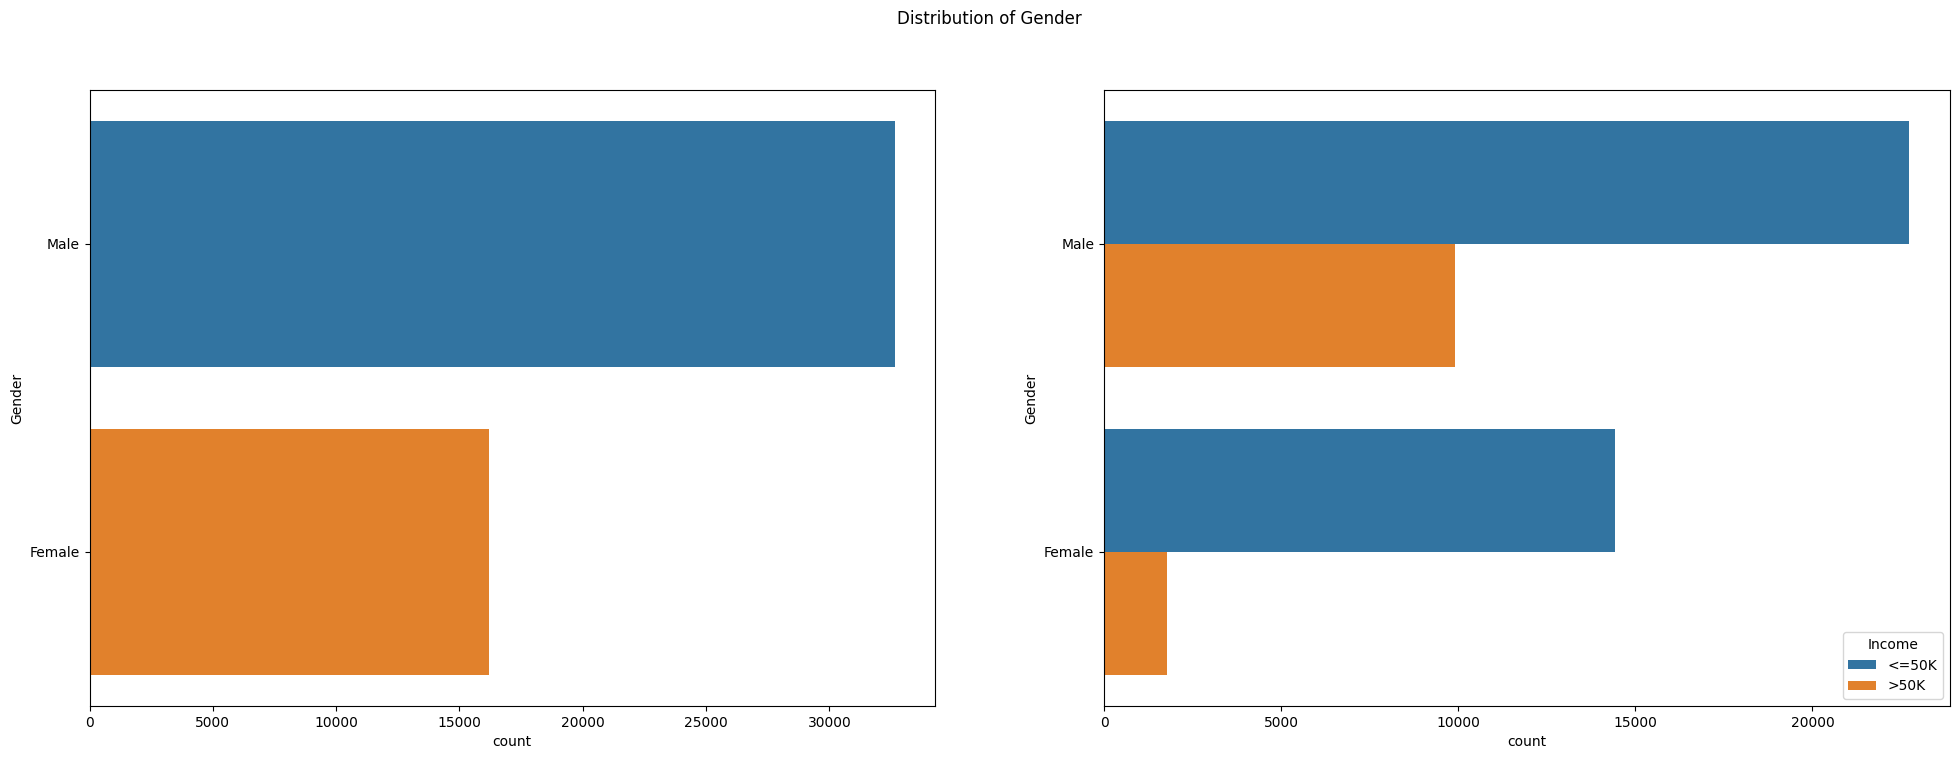


Inspecting feature CapitalGain
Data Type: int64
Total Size: 48842
Unique Values: 123 (0.25%)
Null Values: 0 (0.00%)


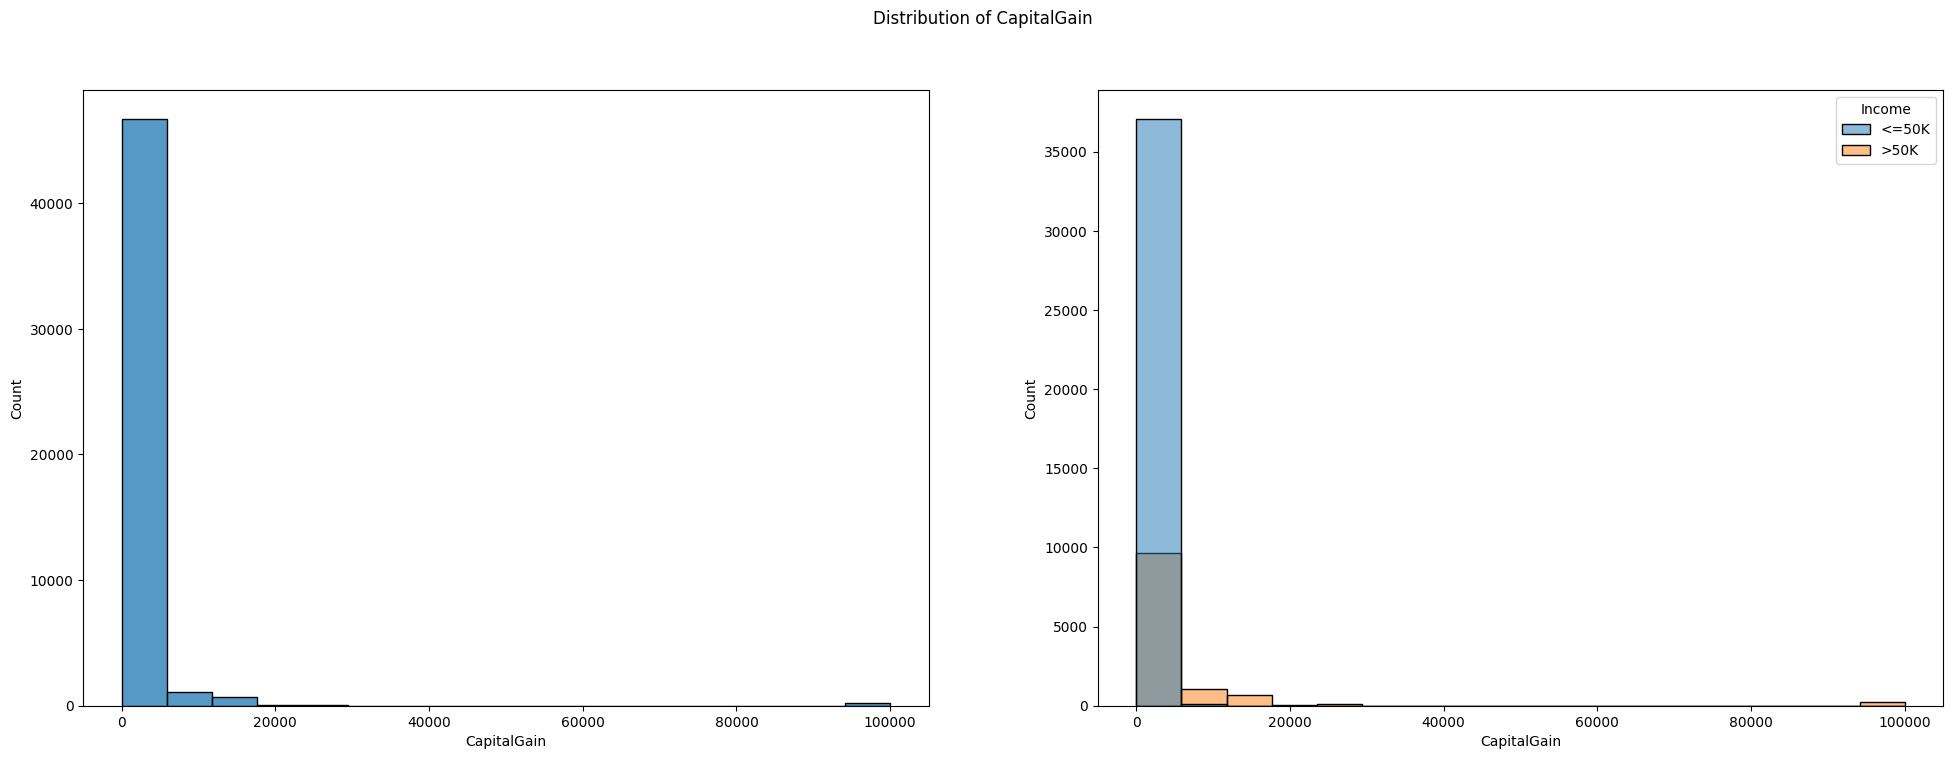


Inspecting feature capitalLoss
Data Type: int64
Total Size: 48842
Unique Values: 99 (0.20%)
Null Values: 0 (0.00%)


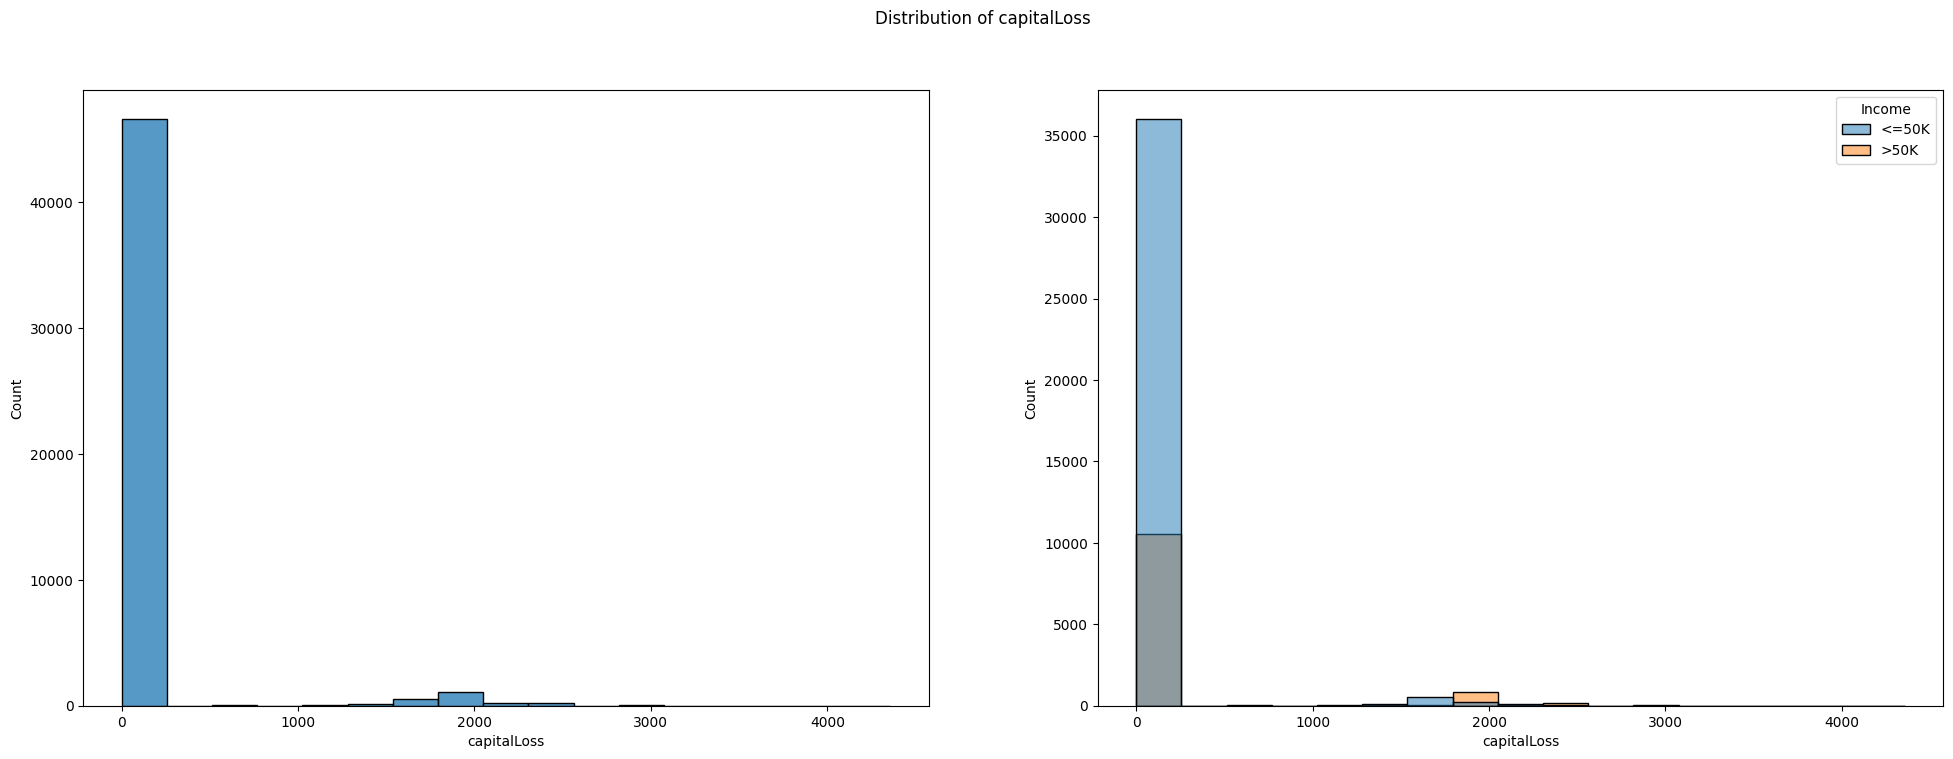


Inspecting feature HoursPerWeek
Data Type: int64
Total Size: 48842
Unique Values: 96 (0.20%)
Null Values: 0 (0.00%)


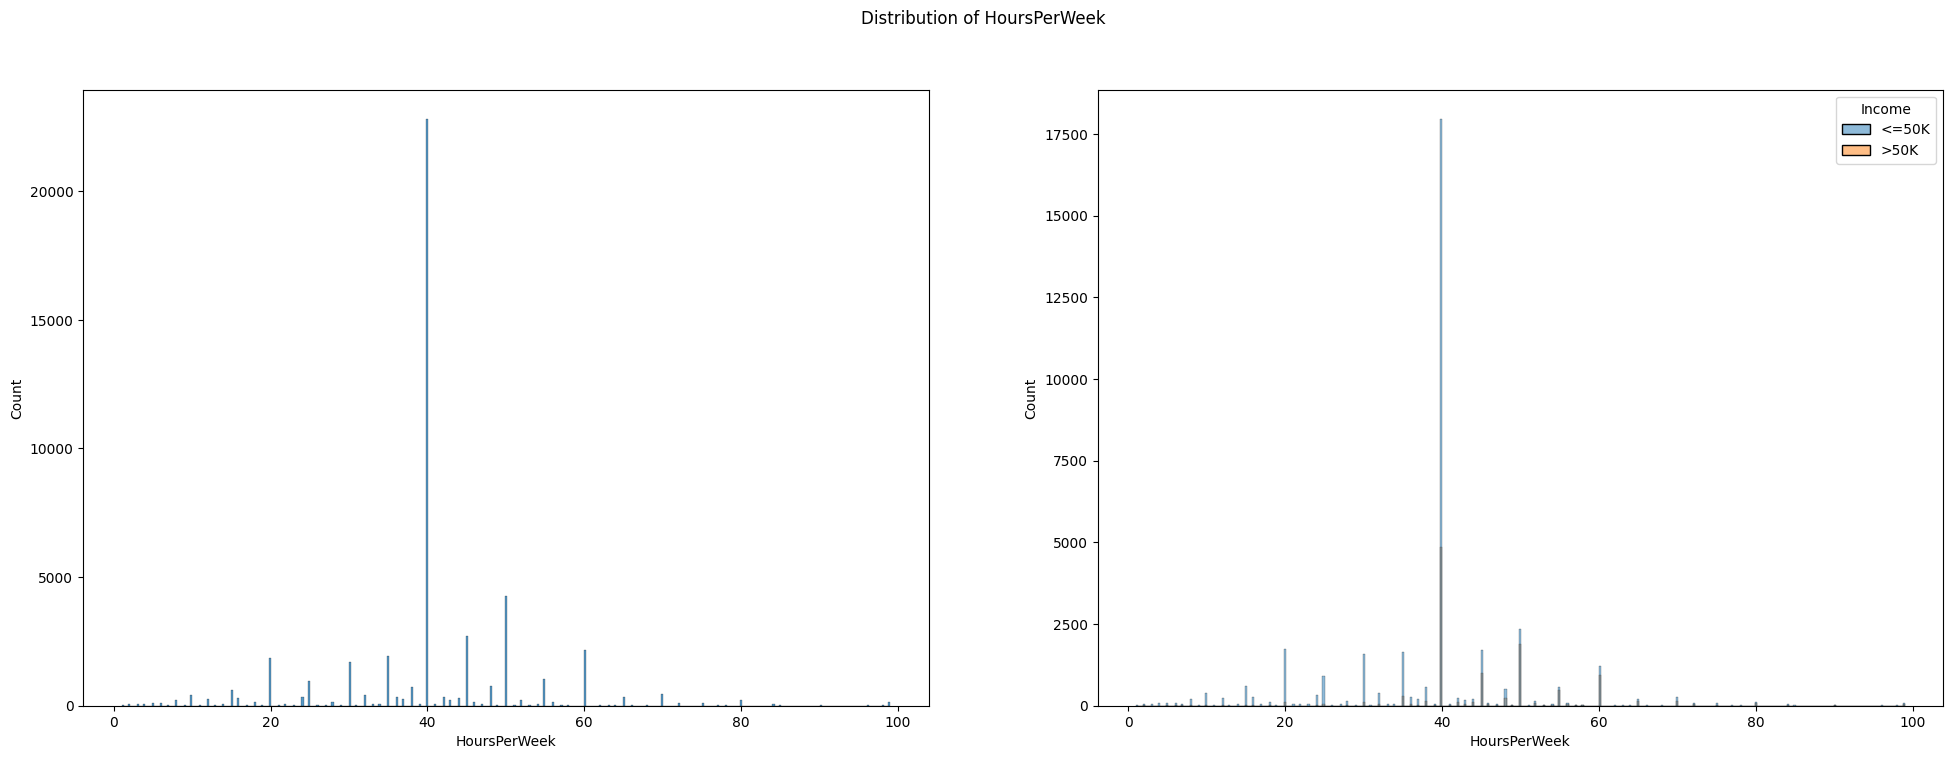


Inspecting feature Country
Data Type: object
Total Size: 48842
Unique Values: 42 (0.09%)
Null Values: 0 (0.00%)


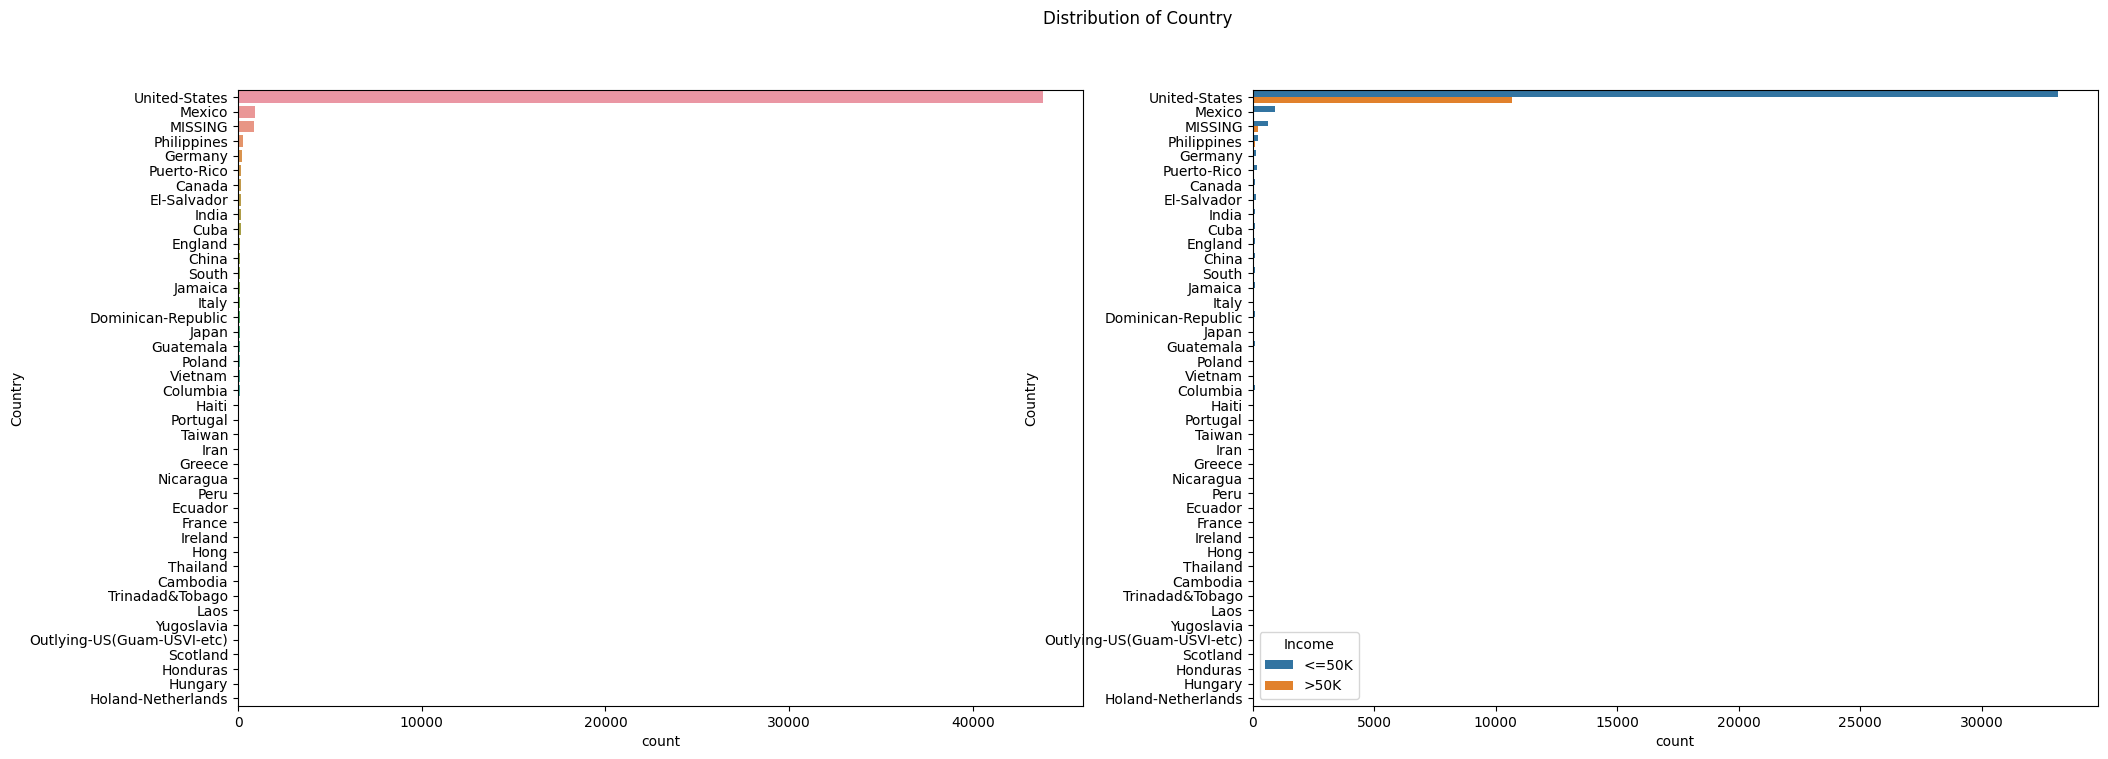

In [175]:
for col in df_adult_income_explore.drop(columns='Income').columns:
  InspectFeature(col)
  print()

# Car Insurance Claims

## Uploading the data

In [124]:
# Filepath for water pumps folder
fpath_car ='https://github.com/YoungVoid/Machine-Learning/raw/main/Car%20Insurance%20Dataset/Car_Insurance_Claim.csv'

# Join features and target DataFrames into one DataFrame
df_car = pd.read_csv(fpath_car)

In [125]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [126]:
df_car.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## Initial Data Analysis

> Source of data

https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

> Brief description of data

Personal information about customers who have and have not claimed.

> What is the target?

The target to predict is the 'OUTCOME' column, which represents whether a person has claimed or not.

> What does one row represent? (A person? A business? An event? A product?)

One row represents a customer.

> Is this a classification or regression problem?

Classification with 2 outcomes (claimed, not claimed)

> How many features does the data have?

18 features

> How many rows are in the dataset?

10000

> What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

Age and Driving experience is in ranges, but other than that, just normal data cleaning processing. There is no data dictionary for this dataset, which may or may not cause problems, but most of the column names are easily understood so impact should be relatively low.